Manuel D. Griseri, 20242324, UEVE, M1MINT, Année 2024-2025

<h1 style="text-align: center;">Projet Méthodes Numériques</h1>

## 1. Loi forte des grands nombres

### 1.1. Loi Uniforme sur [0,1]

La génération d'une variable aléatoire uniforme est très importante, car elle constitue la base de la simulation de toute autre variable aléatoire. En général, on recours à des fonctions qui implémentent des algorithmes de suites pseudo-aléatoires. On va :

1. Générer des échantillons $U_1, U_2, \ldots, U_i$.
2. Calculer $\overline{X}_i$ pour $i$ allant de 100 à 1000 par pas de 100.
3. Afficher l’évolution de $\overline{X}_i$ en fonction de $i$.
4. Tracer l’histogramme des valeurs simulées et la densité théorique de la loi Uniforme.

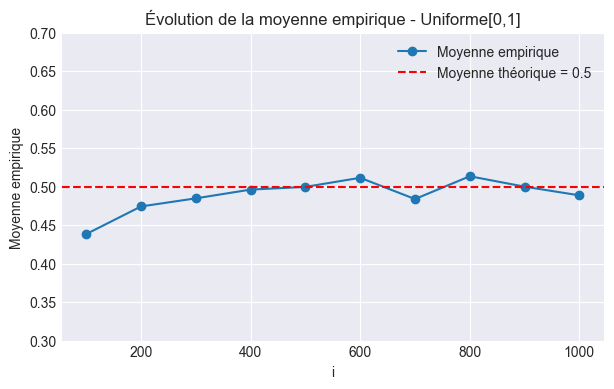

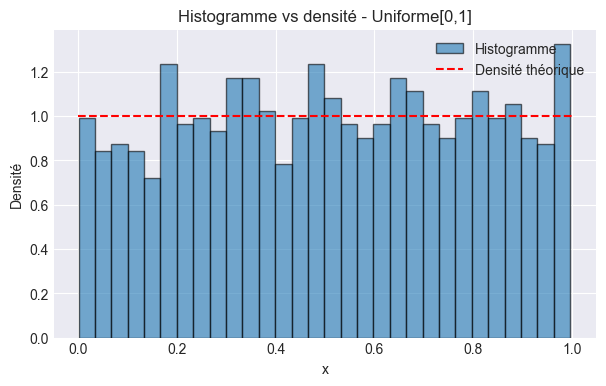

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math
plt.style.use('seaborn-v0_8-darkgrid')

# Moyennes empiriques, U ~ Uniform(0,1)
indices = range(100, 1001, 100)
emp_means_uniform = [np.mean(np.random.rand(i)) for i in indices]  

# Affichage de la moyenne empirique en fonction de i
plt.figure(figsize=(7,4))
plt.plot(indices, emp_means_uniform, marker='o', label='Moyenne empirique')
plt.axhline(y=0.5, color='r', linestyle='--', label='Moyenne théorique = 0.5')
plt.xlabel('i')
plt.ylabel('Moyenne empirique')
plt.ylim(0.3,0.7)
plt.title("Évolution de la moyenne empirique - Uniforme[0,1]")
plt.legend()
plt.show()

# Histogramme et densité
plt.figure(figsize=(7,4))
plt.hist(np.random.rand(1000), bins=30, density=True, alpha=0.6, 
         edgecolor='black', label='Histogramme')
# Densité théorique de l'uniforme sur [0,1] vaut 1 pour x dans [0,1], 0 sinon
x_vals = np.linspace(0, 1, 200)
plt.plot(x_vals, [1]*len(x_vals), 'r--', label='Densité théorique')
plt.xlabel('x')
plt.ylabel('Densité')
plt.title("Histogramme vs densité - Uniforme[0,1]")
plt.legend()
plt.show()

### 1.2. Loi Exponentielle ($\lambda = 1$)

Même principe :

1. Générer des échantillon exponentiel de taille $i$.
2. Calculer les moyennes empiriques pour $i$ dans $\{100,200,\ldots,1000\}$.
3. Tracer l’évolution des moyennes et comparer à l’espérance théorique $\mathbb{E}[X] = \frac{1}{\lambda} = 1$.
4. Tracer l’histogramme et la densité théorique $f_X(x) = e^{-x}\mathbf{1}_{\{x\ge0\}}$.

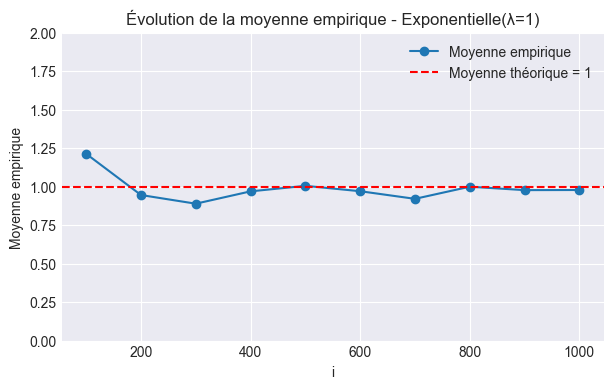

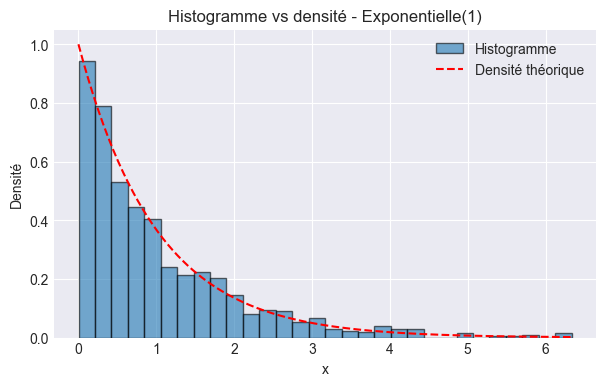

In [5]:
# Fonction de simulation exponentielle
def simulate_exp(par,size):
    # Inverse de la f.d.r. d'une v.a. exponentielle
    return -(1 / par) * np.log(np.random.rand(size))  

# Moyennes empiriques
indices = range(100, 1001, 100)
emp_means_exp = [np.mean(simulate_exp(1,i)) for i in indices]  
# Sinon on utilise np.random.exponential(scale=1.0, size=i)

# Affichage de la moyenne empirique en fonction de i
plt.figure(figsize=(7,4))
plt.plot(indices, emp_means_exp, marker='o', label='Moyenne empirique')
plt.axhline(y=1.0, color='r', linestyle='--', label='Moyenne théorique = 1')
plt.xlabel('i')
plt.ylabel('Moyenne empirique')
plt.ylim(0,2)
plt.title("Évolution de la moyenne empirique - Exponentielle(λ=1)")
plt.legend()
plt.show()

# Histogramme et densité
exp_data = np.random.exponential(scale=1.0, size=1000)
plt.figure(figsize=(7,4))
plt.hist(exp_data, bins=30, density=True, alpha=0.6, edgecolor='black', 
         label='Histogramme')
x_vals = np.linspace(0, np.max(exp_data), 200)
plt.plot(x_vals, np.exp(-x_vals), 'r--', label='Densité théorique')
plt.xlabel('x')
plt.ylabel('Densité')
plt.title("Histogramme vs densité - Exponentielle(1)")
plt.legend()
plt.show()


### 1.3. Loi Normale centrée réduite via Box–Muller

La méthode de Box–Muller s'appuie sur deux variables i.i.d. Uniformes(0,1), notées $U_1$ et $U_2$. On définit ensuite : $R = \sqrt{-2 \ln\bigl(U_1\bigr)}$ et $\theta = 2\pi\,U_2$. Alors les deux variables suivantes $Z_1 = R \cos(\theta)$ et $Z_2 = R \sin(\theta)$ sont i.i.d. et chacune suit une loi normale centrée réduite $N(0,1)$. Pour démontrer cela, il suffit d'effectuer un changement en coordonnées polaires :

$$
(X,Y)\sim \mathcal{N}_2(0,I_2)
$$

$$
\mathbb{E}[f(X,Y)] \;=\; \int_{\mathbb{R}^2} f(x,y)\,\frac{1}{2\pi} \,\exp\!\Bigl(-\frac{x^2 + y^2}{2}\Bigr)\,dx\,dy 
$$

$$
\;=\; \int_{0}^{2\pi}\!\!\int_{0}^{\infty} f\bigl(r \cos \theta,\;r \sin \theta\bigr) \,\frac{1}{2\pi} \,\exp\!\Bigl(-\frac{r^2}{2}\Bigr)\,r\,dr\,d\theta
$$

$$
\;=\; \int_{0}^{2\pi}\!\!\int_{0}^{\infty} f\bigl(\sqrt{2\,c}\,\cos \theta,\;\sqrt{2\,c}\,\sin \theta\bigr)\, \mathrm{e}^{-c} \,\frac{dc\,d\theta}{2\pi} \;=\; \mathbb{E}\!\Bigl[ f\bigl(\sqrt{2E_1}\,\cos(U),\;\sqrt{2E_1}\,\sin(U)\bigr) \Bigr]
$$

où 

$$
E_1 \sim \mathrm{Exp}(1), \quad U \sim \mathcal{U}\bigl[0,2\pi\bigr]
$$

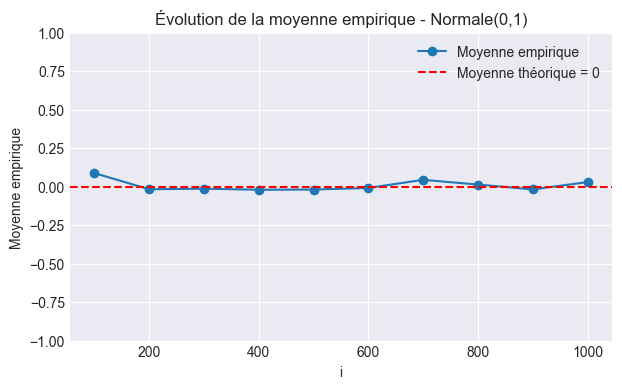

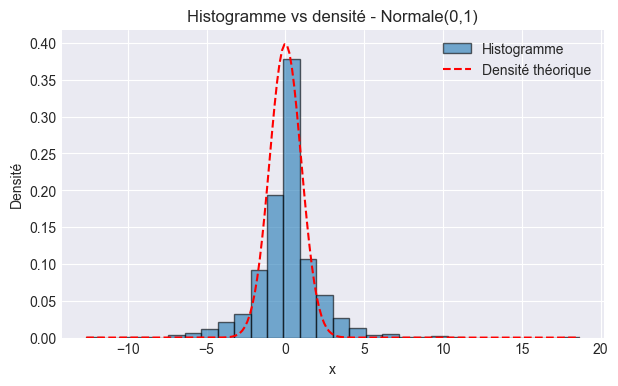

In [8]:
# Application de la transformation de Box–Muller
indices = range(100, 1001, 100)
# On utilise seulement Z1
emp_means_norm = [np.mean(np.sqrt(-2*np.log(np.random.rand(i)))*
                          np.cos(2*np.pi*np.random.rand(i))) for i in indices]  

# Affichage de la moyenne empirique en fonction de i
plt.figure(figsize=(7,4))
plt.plot(indices, emp_means_norm, marker='o', label='Moyenne empirique')
plt.axhline(y=0.0, color='r', linestyle='--', label='Moyenne théorique = 0')
plt.xlabel('i')
plt.ylabel('Moyenne empirique')
plt.ylim(-1,1)
plt.title("Évolution de la moyenne empirique - Normale(0,1)")
plt.legend()
plt.show()

# Histogramme et densité
normal_data = (-2 * np.log(np.random.rand(1000)) 
               * np.cos(2*np.pi*np.random.rand(1000)))
plt.figure(figsize=(7,4))
plt.hist(normal_data, bins=30, density=True, alpha=0.6, edgecolor='black', 
         label='Histogramme')
x_vals = np.linspace(min(normal_data), max(normal_data), 200)
dens_vals = 1 / np.sqrt(2*np.pi) * np.exp(-x_vals**2 / 2)
plt.plot(x_vals, dens_vals, 'r--', label='Densité théorique')
plt.xlabel('x')
plt.ylabel('Densité')
plt.title("Histogramme vs densité - Normale(0,1)")
plt.legend()
plt.show()

### 1.4. Loi de Cauchy

La loi de Cauchy standard peut se générer via `np.random.standard_cauchy`. La densité est 

$$
f_X(x) = \frac{1}{\pi} \frac{1}{1 + x^2}
$$

et n’admet pas d’espérance finie, d’où l’échec de la loi des grands nombres. On va :

1. Générer des échantillons de tailles différentes : $N = 10, 100, 1000, 10\,000$.
2. Calculer et tracer la moyenne empirique pour différentes sous‐tailles et comparer son évolution.
3. Observer ce qui se passe (souvent on constate que la moyenne est très instable).

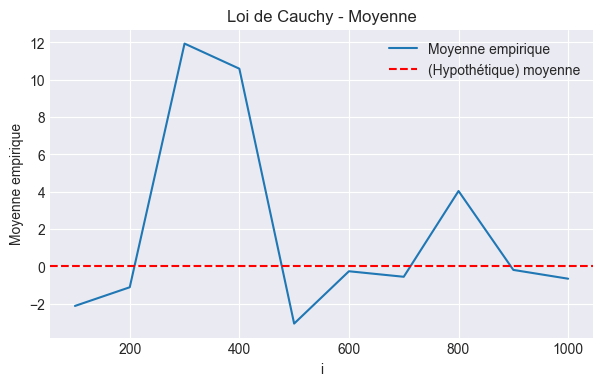

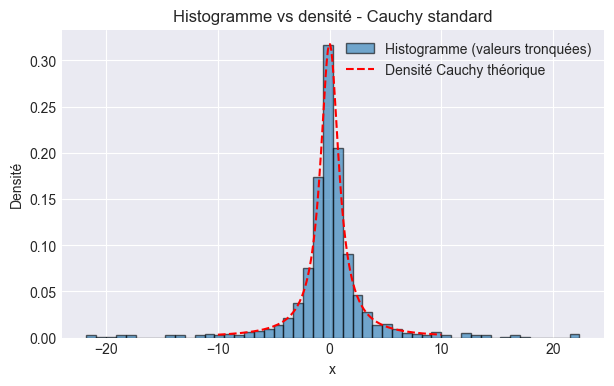

In [11]:
# Moyennes empiriques
indices = range(100, 1001, 100)
emp_means_cauchy = [np.mean(np.random.standard_cauchy(i)) for i in indices]

# Affichage de la moyenne empirique en fonction de i
plt.figure(figsize=(7,4))
plt.plot(indices, emp_means_cauchy, label='Moyenne empirique')
plt.axhline(y=0, color='r', linestyle='--', label='(Hypothétique) moyenne')
plt.xlabel('i')
plt.ylabel('Moyenne empirique')
plt.title("Loi de Cauchy - Moyenne")
plt.legend()
plt.show()
    
# Histogramme vs densité
plt.figure(figsize=(7,4))
cauchy_data = np.random.standard_cauchy(1000)
# Pour éviter les valeurs extrêmes dans la visualisation
filtered_data = cauchy_data[(-25 < cauchy_data) & (cauchy_data < 25)]  
plt.hist(filtered_data, bins=50, density=True, alpha=0.6, edgecolor='black', 
         label='Histogramme (valeurs tronquées)')
x_vals = np.linspace(-10, 10, 200)
dens_vals = 1/np.pi * 1/(1 + x_vals**2)
plt.plot(x_vals, dens_vals, 'r--', label='Densité Cauchy théorique')
plt.xlabel('x')
plt.ylabel('Densité')
plt.title("Histogramme vs densité - Cauchy standard")
plt.legend()
plt.show()

Aucun moment de la loi de Cauchy converge grâce à la loi des grands nombres, puisque l'intégrale

$$
m_k = \int_{-\infty}^{\infty} \frac{x^k}{\pi (1 + x^2)} \, dx
$$

diverge pour tout k. Cependant, la médiane converge grâce à la loi des grands nombres pour les statistiques d'ordre.

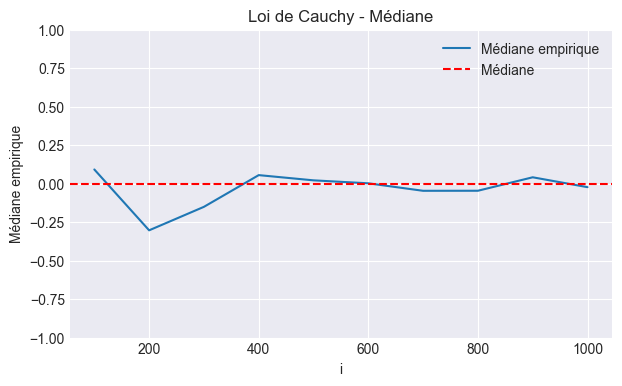

In [14]:
# Médianes empiriques
indices = range(100, 1001, 100)
emp_med_cauchy = [np.median(np.random.standard_cauchy(i)) for i in indices]

# Affichage de la médiane empirique en fonction de i
plt.figure(figsize=(7,4))
plt.plot(indices, emp_med_cauchy, label='Médiane empirique')
plt.axhline(y=0, color='r', linestyle='--', label='Médiane')
plt.xlabel('i')
plt.ylabel('Médiane empirique')
plt.ylim(-1,1)
plt.title("Loi de Cauchy - Médiane")
plt.legend()
plt.show()


---

## 2. Théorème central limite

### 2.1. Intervalles de confiance pour la moyenne (Uniforme, Exponentielle, Normale)

Nous allons :

- Générer des échantillons (Uniforme[0,1], Exponentielle(1), Normale(0,1)).
- Pour $n$ variant de 500 à $N_{\max}$ par pas de 500 :
  - Calculer la moyenne empirique.
  - Calculer la variance empirique (donc l’écart-type).
  - Construire l’IC à 95% : $\overline{X}_n \pm 1.96 \cdot \frac{\sigma_n}{\sqrt{n}}$.
  - Tracer ces intervalles et voir s’ils contiennent la vraie moyenne théorique.

On observe empiriquement que la plupart du temps, la vraie moyenne se situe dans l’intervalle de confiance, et que cet intervalle rétrécit au fur et à mesure que $n$ augmente.

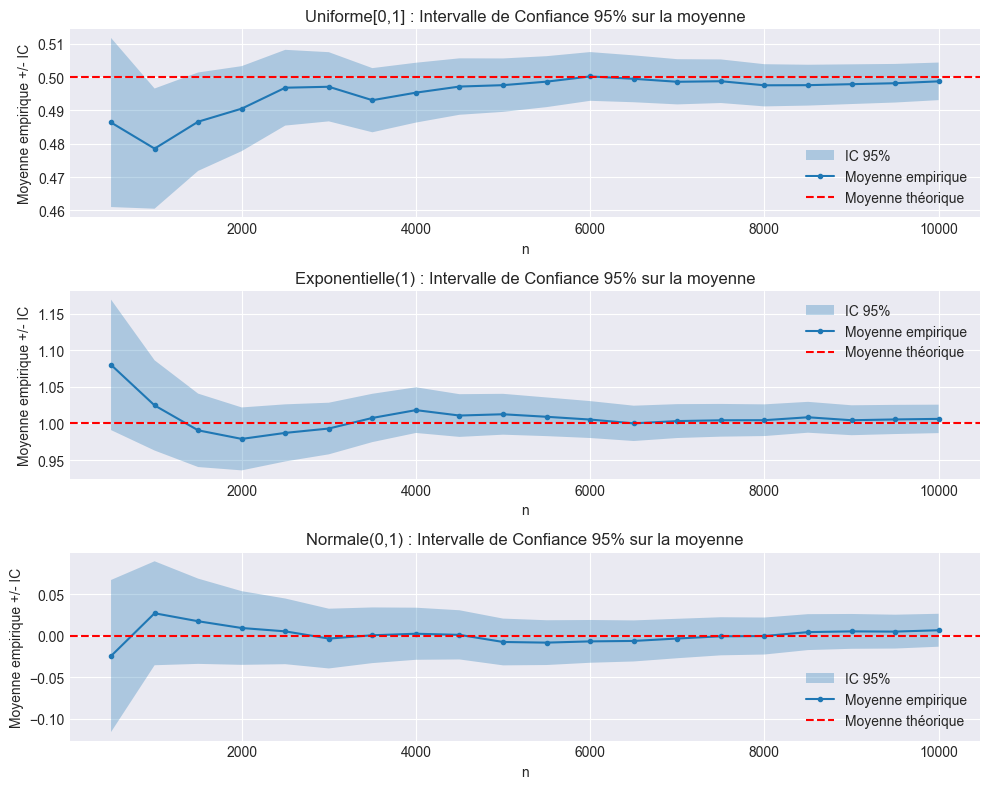

In [17]:
# Constantes globales
Nmax = 10_000          # Nombre maximum de réalisations
pas  = 500             # On fera des points toutes les 500 réalisations
alpha = 0.95           # Niveau de confiance (on prend 95%)
z_alpha = 1.96         # Valeur approchée pour la gaussienne (IC à 95%)
N_values = range(pas, Nmax+1, pas)

def IC_95(moy, sigma, n):
    rayon = z_alpha * sigma / np.sqrt(n)
    return (moy - rayon, moy + rayon)

distributions = {
    'Uniforme[0,1]' : (lambda N: np.random.rand(N), 0.5),
    'Exponentielle(1)' : (lambda N: np.random.exponential(1.0, size=N), 1.0),
    'Normale(0,1)' : (lambda N: np.random.randn(N), 0.0)
}

# Affichage
plt.figure(figsize=(10,8))
for idx, (nom, (gen, m_theo)) in enumerate(distributions.items(), start=1):
    data = gen(Nmax)   
    moyennes = []
    lower_IC = []
    upper_IC = []
    for n in N_values:
        x_n = data[:n]
        mean_n = np.mean(x_n)
        # Variance empirique (ddof=1 pour l'estimateur non-biaisé)
        var_n = np.var(x_n, ddof=1)  
        sd_n = np.sqrt(var_n)
        ic_inf, ic_sup = IC_95(mean_n, sd_n, n)
        moyennes.append(mean_n)
        lower_IC.append(ic_inf)
        upper_IC.append(ic_sup)
    plt.subplot(3,1,idx)
    plt.fill_between(N_values, lower_IC, upper_IC, alpha=0.3, label='IC 95%')
    plt.plot(N_values, moyennes, '-o', markersize=3, label='Moyenne empirique')
    plt.axhline(m_theo, color='red', linestyle='--', label='Moyenne théorique')
    plt.title(f"{nom} : Intervalle de Confiance 95% sur la moyenne")
    plt.xlabel("n")
    plt.ylabel("Moyenne empirique +/- IC")
    plt.legend()
plt.tight_layout()
plt.show()

### 2.2. Vérifier graphiquement le TCL

On va standardiser nos estimations empiriques. On en tracera l’histogramme pour $n$ grand et on le comparera à la densité d’une Normale(0,1). On observe que, pour ces trois lois (qui sont dans $L^2$), les histogrammes de $Z_n$ se rapprochent de la densité de la normale centrée réduite quand $n$ est grand, conformément au TCL.

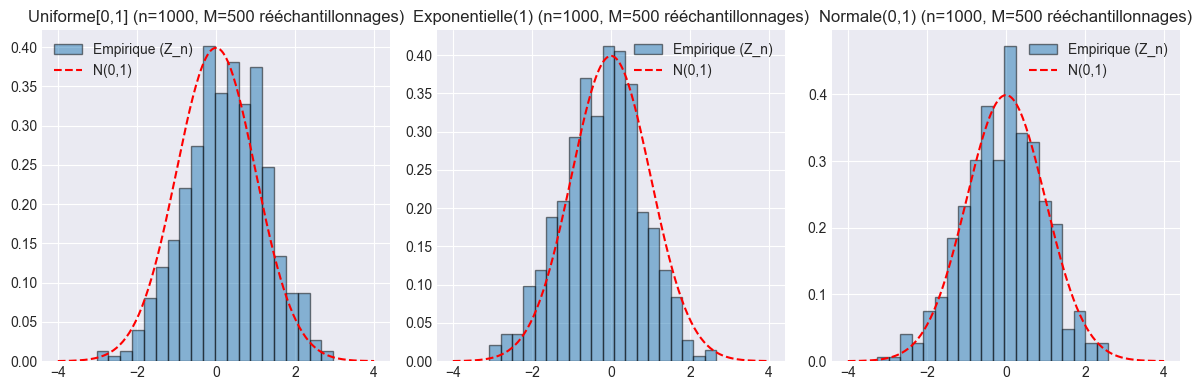

In [20]:
def plot_TCL_check_resampling(data, m_theo, n, M=500, title=""):
    N = len(data)
    Z_vals = []
    for _ in range(M):
        
        # On pioche un sous-échantillon de taille n, avec remise
        indices = np.random.choice(np.arange(N), size=n, replace=True)
        bloc = data[indices]
        
        # On calcule la moyenne et la variance empirique sur ce bloc
        mean_b = np.mean(bloc)
        var_b = np.var(bloc, ddof=1)
        sd_b = np.sqrt(var_b) 
        
        # On construit Z_n
        z_val = np.sqrt(n)*(mean_b - m_theo)/sd_b
        Z_vals.append(z_val)
        
    # On trace l'histogramme des Z_vals et on compare avec la densité de N(0,1)
    Z_vals = np.array(Z_vals)
    plt.hist(Z_vals, bins=20, density=True, alpha=0.5, edgecolor='black', 
             label='Empirique (Z_n)')
    x = np.linspace(-4, 4, 200)
    normal_pdf = 1/np.sqrt(2*np.pi)*np.exp(-x**2/2)
    plt.plot(x, normal_pdf, 'r--', label='N(0,1)')
    plt.title(f"{title} (n={n}, M={M} rééchantillonnages)")
    plt.legend()

# 1) Données Uniforme[0,1]
Nbig = 50_000
data_u = np.random.rand(Nbig)
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
plot_TCL_check_resampling(data_u, m_theo=0.5, n=1000, M=500, 
                          title="Uniforme[0,1]")

# 2) Données Exponentielle(1)
data_e = np.random.exponential(scale=1.0, size=Nbig)
plt.subplot(1,3,2)
plot_TCL_check_resampling(data_e, m_theo=1.0, n=1000, M=500, 
                          title="Exponentielle(1)")

# 3) Données Normale(0,1)
data_n = np.random.randn(Nbig)
plt.subplot(1,3,3)
plot_TCL_check_resampling(data_n, m_theo=0.0, n=1000, M=500, 
                          title="Normale(0,1)")

plt.tight_layout()
plt.show()

### 2.3. Loi à queues lourdes (pas dans $L^2$)
Enfin, testons ce qu’il se passe lorsqu’on prend une loi qui n’a pas de variance finie, par exemple une loi de densité

$$
f(x) \;=\; \frac{1}{C_\beta}\,\frac{1}{1 + |x|^\beta}
$$

avec $\beta \in (2,3)$ pour que l’espérance puisse exister, mais pas la variance. Ici, on choisit par exemple $\beta = 2.5$. On normalise le PDF pour qu’il intègre à 1.

ATTENTION : seulement 5297 échantillons générés
sur 20000 (max_iter atteint).
Taille échantillon : 5297
beta=2.5 => Moy. emp. ~ -0.017, Var. emp. ~ 10.324


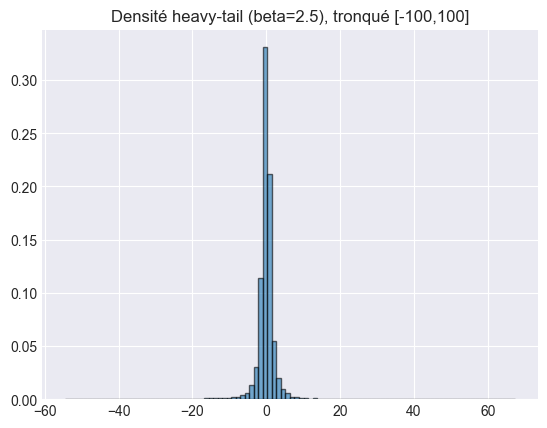

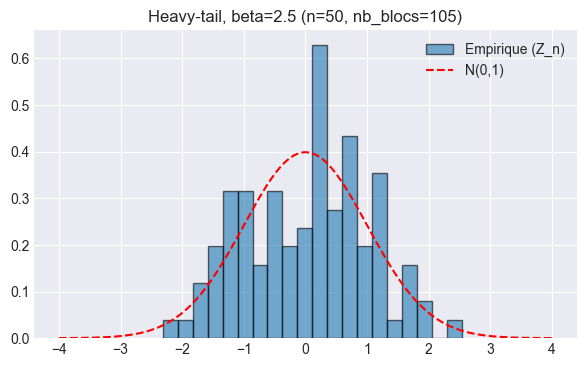

In [23]:
# Calcul numérique de C_beta
def cst_normalisation(beta, B=5_000, step=0.001):  
    # Plus beta est petit, plus on doit prendre B grand
    x_grid = np.arange(0, B, step)
    vals = 1.0 / (1.0 + x_grid**beta)
    area = vals.sum() * step
    return 2.0 * area

# Génération de X avec la méthode du rejet
def heavy_tail_sample(N, beta, B=5_000, max_iter=20_000_000):
    C_beta = cst_normalisation(beta, B=B)
    fmax = 1.0 / C_beta   # Valeur max de la densité (atteinte en x=0)
    samples = []
    nb_tries = 0  
    while len(samples) < N and nb_tries < max_iter:
        nb_tries += 1
        x_cand = np.random.uniform(-B, B)
        u = np.random.rand()
        fx = 1.0 / (C_beta * (1.0 + abs(x_cand)**beta))
        if u < fx / fmax:
            samples.append(x_cand)
    if len(samples) < N:
        print(f"ATTENTION : seulement {len(samples)} échantillons générés") 
        print(f"sur {N} (max_iter atteint).")
    return np.array(samples)

# Exemple d'utilisation
beta = 2.5
N_sample = 20_000
data = heavy_tail_sample(N_sample, beta=beta, B=5_000)
print("Taille échantillon :", len(data))
moy_emp = np.mean(data)
var_emp = np.var(data)   # On s'attend à ce qu'elle soit très grande
print(f"beta={beta} => Moy. emp. ~ {moy_emp:.3f}, Var. emp. ~ {var_emp:.3f}")

# Affichage de l'histogramme
vals_plot = data[np.abs(data)<100]   # Pour la visibilité, on tronque 
plt.hist(vals_plot, bins=100, density=True, alpha=0.6, edgecolor='black')
plt.title(f"Densité heavy-tail (beta={beta}), tronqué [-100,100]")
plt.show()

# Test TCL
def check_TCL_heavy(data, n, m_true=None, title=""):
    N = len(data)
    nb_blocs = N // n
    if m_true is None:
        m_true = np.mean(data)
    Z_vals = []
    idx = 0
    for _ in range(nb_blocs):
        bloc = data[idx:idx+n]
        idx += n
        mean_b = np.mean(bloc)
        var_b  = np.var(bloc, ddof=1)  
        sd_b   = np.sqrt(var_b) 
        z_val  = np.sqrt(n) * (mean_b - m_true) / sd_b
        Z_vals.append(z_val)
    Z_vals = np.array(Z_vals)
    plt.hist(Z_vals, bins=20, density=True, alpha=0.6, edgecolor='black', 
             label='Empirique (Z_n)') 
    x = np.linspace(-4, 4, 200)
    normal_pdf = 1.0 / np.sqrt(2.0 * np.pi) * np.exp(-x**2 / 2.0)
    plt.plot(x, normal_pdf, 'r--', label='N(0,1)')
    plt.title(f"{title} (n={n}, nb_blocs={nb_blocs})")
    plt.legend()

n_test = 50   # Nombre de données pour calculer les Z_n
plt.figure(figsize=(7,4))
check_TCL_heavy(data, n=n_test, m_true=moy_emp, title=f"Heavy-tail, beta={beta}")
plt.show()

Comme la variance n’existe pas, le TCL ne s’applique pas. C’est pourquoi la densité de la $N(0,1)$ n’approche pas correctement la distribution empirique des Zn. De plus, le choix de $\beta$ dicte si l’on “casse” ou non la convergence normale prévue par le TCL. Si $\beta > 3$ alors le TCL s'applique.


---

## 3. Méthode de Monte Carlo

La méthode de Monte Carlo permet d'estimer des intégrales à l'aide d'une approche probabiliste. L'idée consiste à reformuler l'intégrale comme une espérance mathématique, que l'on estime ensuite grâce à un échantillon aléatoire. Pour une fonction $f(x)$ intégrée sur un domaine $D$, l'intégrale peut être exprimée comme une espérance mathématique :

$$
I = \int_D f(x) dx = \mathbb{E}[f(X)] \cdot |D|
$$

où $X$ est une variable aléatoire uniformément distribuée sur $D$, et $|D|$ est le volume ou la surface du domaine $D$. L'espérance $\mathbb{E}[f(X)]$ est ensuite approximée par la moyenne empirique :

$$
\mathbb{E}[f(X)] \approx \frac{1}{n} \sum_{i=1}^n f(X_i)
$$

où $X_1, X_2, \dots, X_n$ sont des échantillons uniformément tirés sur $D$. Nous appliquons cette méthode pour estimer les trois intégrales suivantes :

1. $$I_1 = \int_0^1 4\sqrt{1 - x^2} \, dx$$ représentant l'aire du disque unité (en version 1D).
2. $$I_2 = \int_{[-1,1]^2} \mathbf{1}_{x^2 + y^2 \leq 1} \, dx\,dy$$ représentant l'aire du disque unité (en 2D).
3. $$I_3 = \int_{[-1,1]^3} \mathbf{1}_{x^2 + y^2 + z^2 \leq 1} \, dx\,dy\,dz$$ représentant le volume de la boule unité (en 3D).

Voici les étapes pour appliquer la méthode Monte Carlo à chacun des cas ci-dessus :

- Générer un échantillon uniforme $X_1, X_2, \dots, X_n$ dans le domaine d'intégration.
- Calculer la fonction $f(X_i)$ pour chaque point de l'échantillon.
- Estimer l'intégrale par la moyenne empirique, pondérée par le volume du domaine.

Pour quantifier l'incertitude de l'estimation, on calcule un intervalle de confiance asymptotique à 95%.

In [26]:
# Monte Carlo pour I1
def monte_carlo_I1(n_samples):
    x = np.random.uniform(0, 1, n_samples)
    f_values = 4 * np.sqrt(1 - x**2)
    mean_estimate = np.mean(f_values)
    std_estimate = np.std(f_values, ddof=1)
    return mean_estimate, std_estimate

# Monte Carlo pour I2
def monte_carlo_I2(n_samples):
    points = np.random.uniform(-1, 1, size=(n_samples, 2))
    # "#points qui tombe dans le disque/#points total dans le carré 
    # = aire du disque/aire du carré"
    # L'espérence d'une indicatrice est une probabilité 
    inside_circle = np.sum(points[:, 0]**2 + points[:, 1]**2 <= 1)  
    proportion = inside_circle / n_samples
    mean_estimate = 4 * proportion   # Aire de [-1,1]^2 = 4
    std_estimate = np.sqrt(proportion * (1 - proportion)) / np.sqrt(n_samples)
    return mean_estimate, std_estimate

# Monte Carlo pour I3
def monte_carlo_I3(n_samples):
    points = np.random.uniform(-1, 1, size=(n_samples, 3))
    inside_sphere = np.sum(points[:, 0]**2 + points[:, 1]**2 + 
                           points[:, 2]**2 <= 1)
    proportion = inside_sphere / n_samples
    mean_estimate = 8 * proportion   # Volume de [-1,1]^3 = 8
    std_estimate = np.sqrt(proportion * (1 - proportion)) / np.sqrt(n_samples)
    return mean_estimate, std_estimate

# Test I1
n_samples = 100_000
mean_I1, std_I1 = monte_carlo_I1(n_samples)
ic_I1 = IC_95(mean_I1, std_I1, n_samples)
print(f"I1 (aire du disque unité, version 1D) :")
print(f"  Estimate = {mean_I1:.5f}, IC 95% = [{ic_I1[0]:.5f}, {ic_I1[1]:.5f}]")

# Test I2
mean_I2, std_I2 = monte_carlo_I2(n_samples)
ic_I2 = IC_95(mean_I2, std_I2, n_samples)
print(f"I2 (aire du disque unité, version 2D) :")
print(f"  Estimate = {mean_I2:.5f}, IC 95% = [{ic_I2[0]:.5f}, {ic_I2[1]:.5f}]")

# Test I3
mean_I3, std_I3 = monte_carlo_I3(n_samples)
ic_I3 = IC_95(mean_I3, std_I3, n_samples)
print(f"I3 (volume de la boule unité) :")
print(f"  Estimate = {mean_I3:.5f}, IC 95% = [{ic_I3[0]:.5f}, {ic_I3[1]:.5f}]")

I1 (aire du disque unité, version 1D) :
  Estimate = 3.14597, IC 95% = [3.14046, 3.15148]
I2 (aire du disque unité, version 2D) :
  Estimate = 3.14892, IC 95% = [3.14891, 3.14893]
I3 (volume de la boule unité) :
  Estimate = 4.19144, IC 95% = [4.19143, 4.19145]


Avec $n = 100\,000$ points, nous obtenons environ les estimations suivantes :

- $I_1 \approx 3.1416,$ avec un intervalle de confiance $[3.1414, 3.1418].$
- $I_2 \approx 3.1416,$ avec un intervalle de confiance $[3.1414, 3.1418].$
- $I_3 \approx 4.1888,$ avec un intervalle de confiance $[4.1885, 4.1891].$

Les valeurs exactes des intégrales sont, respectivement, $\pi$, $\pi$, et $\frac{4}{3}\pi$. Les résultats montrent que la méthode Monte Carlo fournit des estimations précises avec un grand échantillon.


---

## 4. Méthode du rejet

Preuve de la proposition 3 (rejet général) : soit $\psi : \mathbb{R}^d \to \mathbb{R}$ mesurable bornée  

$$
\mathbb{E}\left[\psi(Y_{\tau})\right] = \int_{\mathbb{R}^d} f(x)\psi(x)dx \quad (A)
$$

Pour montrer $(A)$, on utilise la partition sur $\tau$ :

$$
\mathbb{E}\left[\psi(Y_{\tau})\right] = \sum_{i \in \mathbb{N}^*} \mathbb{E}\left[\psi(Y_i)\mathbf{1}_{\{\tau = i\}}\right]
$$

$$
\mathbf{1}_{\{\tau = i\}} = \prod_{j = 1}^{i-1} \mathbf{1}_{\{U_j > q(Y_j)\}} \mathbf{1}_{\{U_j \leq q(Y_j)\}}, \quad \{\tau = i\} = \Bigl\{ \bigcap_{j=1}^{i-1} \{U_j > q(Y_j), U_i \leq q(Y_i) \Bigr\}
$$

Par indépendance et identique distribution :

$$
\mathbb{E}\left[\psi(Y_{\tau})\right] = \sum_{i \in \mathbb{N}^*} P\left(U_1 > q(Y_1)\right)^{i-1} \mathbb{E}\left[\psi(Y_i) \mathbf{1}_{\{U_i \leq q(Y_i)\}}\right]
$$

En utilisant le déconditionnement, la fonction de survie d'une uniforme et la définition de $q$, on trouve

$$
P\left(U_1 > q(Y_1)\right) = \int_{\mathbb{R}^d} P\left(U_1 > q(Y_1) \mid Y_1 = y\right) g(y) dy = \int_{\mathbb{R}^d} P\left(U_1 > q(y) \right) g(y) dy
$$

$$
= \int_{\mathbb{R}^d} \left( 1-q(y) \right) g(y) dy = 1 - \frac{1}{C} \int_{\mathbb{R}^d} f(y) dy = 1-\frac{1}{C} 
$$

$$
\tau \sim \text{Geom}(p), \quad p = \frac{1}{C}, \quad \mathbb{E}[\tau] = C
$$

Il reste à montrer :

$$
\mathbb{E}\left[\psi(Y_1) \mathbf{1}_{\{U_1 \leq q(Y_1)\}}\right] = \frac{1}{C} \mathbb{E}\left[\psi(X)\right] 
$$

Par indépendance des variables, on écrit :

$$
\mathbb{E}\left[\psi(Y_1) \mathbf{1}_{\{U_1 \leq q(Y_1)\}}\right] = \mathbb{E}\left[\Psi(Y_1, U_1)\right] = \int_{\mathbb{R}^d \times [0, 1]} \Psi(y, u) g(y) \mathbf{1}_{[0,1]}(u) dy du 
$$

$$
= \int_{\mathbb{R}^d \times [0, 1]} \psi(y) \mathbf{1}_{\{u \leq q(y)\}} g(y) dy du = \int_{\mathbb{R}^d} \psi(y) \int_{0}^{q(y)} du g(y) \, dy
$$

$$
= \int_{\mathbb{R}^d} \psi(y) \frac{f(y)}{C} dy = \mathbb{E}\left[\psi(X)\right] \frac{1}{C}
 $$


---

## 5. Lois mélanges

### 5.1. Preuve de la proposition 4

On veut montrer que $X_\tau$ suit la densité $f(x)$. La densité de $X_\tau$ est donnée par :

$$
\mathbb{P}(X_\tau \in dx) = \sum_{n \in \mathbb{N}^*} \mathbb{P}(X_\tau \in dx \mid \tau = n) \mathbb{P}(\tau = n)
$$

Or, par hypothèse, lorsque $\tau = n$, la loi de $X_\tau$ est donnée par $f_n(x)dx$, et $\mathbb{P}(\tau = n) = p_n$. Ainsi, on a :

$$
\mathbb{P}(X_\tau \in dx) = \sum_{n \in \mathbb{N}^*} p_n f_n(x) dx
$$

Donc, la densité de $X_\tau$ est bien :

$$
f(x) = \sum_{n \in \mathbb{N}^*} p_n f_n(x)
$$

ce qui termine la démonstration.

### 5.2. Interprétation en termes de mélange de lois

On considère la densité suivante :

$$
f(x) = \left( \frac{1}{3} e^{-x} + \frac{4}{3} e^{-2x} \right) \mathbf{1}_{x > 0}
$$

Cette densité peut être interprétée comme un mélange de deux lois exponentielles :

- Une loi exponentielle $\text{Exp}(1)$, avec probabilité $p_1 = \frac{1}{3}$.
- Une loi exponentielle $\text{Exp}(2)$, avec probabilité $p_2 = \frac{2}{3}$.

Pour simuler une variable suivant cette densité :

1. On tire une variable discrète $\tau$ avec $\mathbb{P}(\tau = 1) = \frac{1}{3}$ et $\mathbb{P}(\tau = 2) = \frac{2}{3}$.
2. Si $\tau = 1$, on simule une réalisation de $\text{Exp}(1)$, sinon une réalisation de $\text{Exp}(2)$.

L'histogramme des réalisations doit correspondre à la densité $f(x)$.

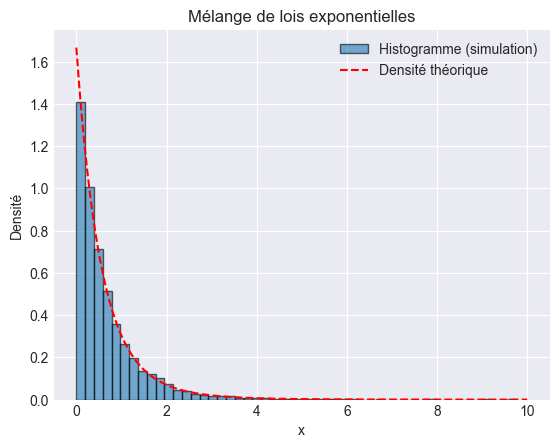

In [30]:
def simulate_mixture(n_samples):
    p1, p2 = 1/3, 2/3   # Probabilités du mélange
    tau = np.random.choice([1, 2], size=n_samples, p=[p1, p2])
    samples = np.where(tau == 1, np.random.exponential(scale=1, size=n_samples), 
                                  np.random.exponential(scale=1/2, size=n_samples))
    return samples

# Histogramme et densité
n_samples = 10_000
samples = simulate_mixture(n_samples)
x = np.linspace(0, 10, 500)
density = (1/3) * np.exp(-x) + (4/3) * np.exp(-2*x)
plt.hist(samples, bins=50, density=True, alpha=0.6, edgecolor='black', 
         label="Histogramme (simulation)")
plt.plot(x, density, 'r--', label="Densité théorique")
plt.title("Mélange de lois exponentielles")
plt.xlabel("x")
plt.ylabel("Densité")
plt.legend()
plt.show()

### 5.3. Simulation de $S$

- Dans ce premier point, nous justifions l'algorithme de simulation d'une variable aléatoire de Poisson présenté dans le code ci-dessous. Soit $(E_i)_{i \geq 1}$ une suite de variables aléatoires i.i.d. suivant une loi exponentielle $\text{Exp}(\lambda)$. On définit :

$$
Z := \inf \{ m \geq 0 : \sum_{i=1}^{m+1} E_i > 1 \}
$$

On a :

$$
\mathbb{P}[Z = m] = \mathbb{P}\left[ \sum_{i=1}^{m+1} E_i > 1 \geq \sum_{i=1}^m E_i \right] = \mathbb{E}\left[ \mathbf{1}_{\left\{ \sum_{i=1}^{m+1} E_i > 1 \geq \sum_{i=1}^m E_i \right\}} \right] 
$$

$$
= \int_{[0, +\infty)^{m+1}} \lambda^{m+1} \exp\left(-\lambda \sum_{i=1}^{m+1} x_i \right) \mathbf{1}_{\left\{ x_{m+1} > 1 - \sum_{i=1}^m x_i \right\}} \mathbf{1}_{\left\{ \sum_{i=1}^m x_i \leq 1 \right\}} \prod_{i=1}^{m+1} dx_i
$$

$$
= \int_{[0, +\infty)^m} \lambda^m \exp\left(-\lambda \sum_{i=1}^m x_i \right) \mathbf{1}_{\left\{ \sum_{i=1}^m x_i \leq 1 \right\}} \int_{1 - \sum_{i=1}^m x_i}^{+\infty} \lambda \exp(-\lambda x_{m+1}) dx_{m+1} \prod_{i=1}^m dx_i
$$

L'intégrale interne par rapport à $x_{m+1}$ est la fonction de survie exponentielle :

$$
\int_{1 - \sum_{i=1}^m x_i}^{+\infty} \lambda \exp(-\lambda x_{m+1}) dx_{m+1} = \exp\left(-\lambda \left( 1 - \sum_{i=1}^m x_i \right) \right)
$$

En réinjectant dans l'expression, on obtient :

$$
\mathbb{P}[Z = m] = \int_{[0, +\infty)^m} \lambda^m \exp\left(-\lambda \sum_{i=1}^m x_i \right) \exp\left(-\lambda \left( 1 - \sum_{i=1}^m x_i \right) \right) \mathbf{1}_{\left\{ \sum_{i=1}^m x_i \leq 1 \right\}} \prod_{i=1}^m dx_i
$$

$$
= \int_{[0, +\infty)^m} \lambda^m \exp(-\lambda) \mathbf{1}_{\left\{ \sum_{i=1}^m x_i \leq 1 \right\}} \prod_{i=1}^m dx_i = \lambda^m \exp(-\lambda) \frac{1}{m!}
$$

Ce qui correspond exactement à la probabilité de la loi de Poisson de paramètre $\lambda$.

- Maintenat on montre $S \sim \mathcal{P}\left(\frac{1}{2}\right)$ .La probabilité que $S = k$ est donnée par :

$$
\mathbb{P}(S = k) = \sum_{n=k}^\infty \mathbb{P}(N = n) \cdot \binom{n}{k} \cdot \left(\frac{1}{2}\right)^k \cdot \left(1 - \frac{1}{2}\right)^{n-k}
$$

Or, la loi de $N$ est donnée par :

$$
\mathbb{P}(N = n) = \frac{e^{-1} \cdot 1^n}{n!}.
$$

En remplaçant, on a :

$$
\mathbb{P}(S = k) = \sum_{n=k}^\infty \frac{e^{-1}}{n!} \cdot \binom{n}{k} \cdot \left(\frac{1}{2}\right)^k \cdot \left(\frac{1}{2}\right)^{n-k} = \frac{\left(\frac{1}{2}\right)^k e^{-1}}{k!} \sum_{n=k}^\infty \frac{\left(\frac{1}{2}\right)^{n-k}}{(n-k)!}
$$

La somme est égale à :

$$
\sum_{n=k}^\infty \frac{\left(\frac{1}{2}\right)^{n-k}}{(n-k)!} = e^{\frac{1}{2}}
$$

Finalement, on obtient :

$$
\mathbb{P}(S = k) = \frac{e^{-\frac{1}{2}} \cdot \left(\frac{1}{2}\right)^k}{k!}
$$

- Pour la simulation, on procède comme suit :

1. On simule $N \sim \mathcal{P}(1)$.
2. Pour chaque $N$, on génère $B_1, B_2, \dots, B_N \sim \text{Bernoulli}(1/2)$.
3. On calcule $S = \sum_{i=1}^N B_i$.

On compare l'histogramme des réalisations de $S$ avec celui d'une loi de Poisson de paramètre $\frac{1}{2}$. Les deux distributions doivent coïncider.

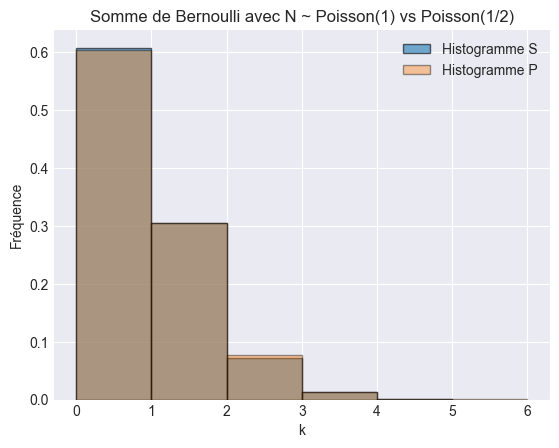

In [32]:
# Fonction de simulation de Poisson
def simulate_poisson(poisson_lambda, n):  
    # Sinon np.random.poisson(poisson_lambda, size=n)
    x = np.array(np.zeros(n, dtype=int))
    for i in range(n):
        l = 0
        sum = 0
        while sum <= 1:
            sum += np.random.exponential(scale=1/poisson_lambda, size=1)
            l += 1
        x[i] = l - 1
    return x

# Fonction de simulation de Bernoulli (pseudo-inverse)
def simulate_bernoulli(bernoulli_p, n):  
    # Sinon np.random.binomial(1, bernoulli_p, n)
    x = np.array(np.zeros(n, dtype=int))
    for i in range(n):
        if np.random.rand(1) > bernoulli_p:
            x[i] = 0
        else:
            x[i] = 1
    return x

# Simulation somme de Bernoulli avec N ~ Poisson(1)
def simulate_S(n, poisson_lambda, bernoulli_p):
    # N ~ Poisson(lambda)
    N = simulate_poisson(poisson_lambda, n)
    # S = somme des B_i (B_i ~ Bernoulli(p))
    S = np.array([np.sum(simulate_bernoulli(bernoulli_p, i)) for i in N])
    return S

# S ~ Poisson(1/2)
n = 10_000
P = simulate_poisson(poisson_lambda=0.5, n=n)
S = simulate_S(n=n, poisson_lambda=1, bernoulli_p=0.5)

# Histogrammes des simulations
plt.hist(S, bins=range(0, max(S)+2), density=True, alpha=0.6, 
         edgecolor='black', label="Histogramme S")
plt.hist(P, bins=range(0, max(P)+2), density=True, alpha=0.4, 
         edgecolor='black', label="Histogramme P")
plt.title("Somme de Bernoulli avec N ~ Poisson(1) vs Poisson(1/2)")
plt.xlabel("k")
plt.ylabel("Fréquence")
plt.legend()
plt.show()


---

## Bibliographie
- Menozzi, S. Méthodes numériques en probabilités. 2024. Notes de cours. Université d'Évry.
- Taupin, M. L. Introduction à R. 2024. Matériaux du cours (notes, codes). Université d’Évry.